# Business Case: Delhivery - Feature Engineering

### About Delhivery
    
    

In [475]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from statsmodels.graphics.gofplots import qqplot

from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import shapiro, kstest 

from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [336]:
def shapiro_test(series):
    print("Mean : ", round(series.mean(),2),", Standard deviation : ",round(series.std(),2))
    
    # calling function for shapiro test
    test_stat, p_value = shapiro(series)   
    
    print("p-value : ", p_value)
    if p_value < 0.05:
        print("Reject H0")
        print("Data is not Gaussian")
    else:
        print("Fail to reject H0")
        print("Data is Gaussian")
           
    
def kstest_test(series):
    mu = series.mean()
    sigma = series.std()
    print("Mean : ", round(series.mean(),2),", Standard deviation : ",round(series.std(),2))
    
    # calling function for ks-test
    test_stat, p_value = kstest(
        series,
        norm.cdf,
        args=(mu, sigma)
    )
    
    print("p-value : ", p_value)
    if p_value < 0.05:
        print("Reject H0")
        print("Data is not Gaussian")
    else:
        print("Fail to reject H0")
        print("Data is Gaussian")
        
        
def ttest_ind_test(series1,series2,alternative='two-sided'):
    print("Series1 metrics : ")
    print("Mean : ", round(series1.mean(),2),", Standard deviation : ",round(series1.std(),2))
    print("Series2 metrics : ")
    print("Mean : ", round(series2.mean(),2),", Standard deviation : ",round(series2.std(),2))
    
    # calling function for t-test for 2 independent samples
    t_stat, p_value = ttest_ind(series1,series2,alternative=alternative)
    print("p-value : ", p_value)
    if p_value < 0.10:
        print("Reject H0")
    else:
        print("Fail to reject H0")


#### 1. Define Problem Statement and perform Exploratory Data Analysis (10 points)

##### Business Problem:
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.
    The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.  

• The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [2]:
df = pd.read_csv("delhivery_data.csv")

In [14]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
df.shape

(144867, 24)

In [4]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [35]:
# converting all the dateime fields to datetime form object
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])


In [10]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [9]:
(100*df.isna().sum()/df.shape[0]).round(2)

data                              0.00
trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
is_cutoff                         0.00
cutoff_factor                     0.00
cutoff_timestamp                  0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
factor                            0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
segment_factor                    0.00
dtype: float64

### 3. Merging of rows and aggregation of fields (10 Points)

In [15]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [494]:
## grouping the data summing up all the subtrips to complete trips

In [28]:
groupby_dict = {   
    'data' : 'first',
    
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    
    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum'   
}

In [29]:
df['tsd'] = df['trip_uuid']+df['source_center']+df['destination_center']

In [37]:
df_tsd = df.groupby('tsd').agg(groupby_dict).reset_index()

In [38]:
df_tsd.head()

,tsd,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


In [48]:
df_tsd['od_time_diff'] = ((df_tsd['od_end_time'] - df_tsd['od_start_time']).dt.total_seconds()/60)

In [49]:
df_tsd.head()

,tsd,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929


In [55]:
groupby_trip_dict = {
    'data' : 'first',
    
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'start_scan_to_end_scan' : 'sum',
    'od_time_diff' : 'sum', 
    
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    
    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',
}

In [59]:
df_trip = df_tsd.groupby('trip_uuid').agg(groupby_trip_dict).reset_index()

In [61]:
df_trip.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


In [62]:
df_trip.shape

(14817, 18)

In [63]:
df_trip.dtypes

trip_uuid                                 object
data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
start_scan_to_end_scan                   float64
od_time_diff                             float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_distance                    float64
segment_osrm_time                        float64
dtype: object

In [65]:
df_trip.isna().sum()

trip_uuid                          0
data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
start_scan_to_end_scan             0
od_time_diff                       0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_distance              0
segment_osrm_time                  0
dtype: int64

In [81]:
(df_trip.describe().T).round(0)

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14817.0,531.0,659.0,23.0,149.0,280.0,637.0,7898.0
od_time_diff,14817.0,532.0,659.0,23.0,150.0,281.0,638.0,7899.0
actual_distance_to_destination,14817.0,164.0,305.0,9.0,23.0,48.0,165.0,2187.0
actual_time,14817.0,357.0,561.0,9.0,67.0,149.0,370.0,6265.0
osrm_time,14817.0,161.0,271.0,6.0,29.0,60.0,168.0,2032.0
osrm_distance,14817.0,204.0,370.0,9.0,31.0,66.0,208.0,2840.0
segment_actual_time,14817.0,354.0,556.0,9.0,66.0,147.0,367.0,6230.0
segment_osrm_distance,14817.0,223.0,417.0,9.0,33.0,70.0,219.0,3524.0
segment_osrm_time,14817.0,181.0,315.0,6.0,31.0,65.0,185.0,2564.0


In [83]:
(df_trip.describe(include='object').T)

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
data,14817,2,training,10654
route_schedule_uuid,14817,1504,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
route_type,14817,2,Carting,8908
source_center,14817,938,IND000000ACB,1063
source_name,14807,933,Gurgaon_Bilaspur_HB (Haryana),1063
destination_center,14817,1042,IND000000ACB,821
destination_name,14809,1034,Gurgaon_Bilaspur_HB (Haryana),821


### Continuing Question 1.
### 5. Missing values Treatment & Outlier treatment (10 Points)

In [232]:
# As we say in the vizualization the data is heavily skewed towards right, we do log normalization so that the data
# looks normalized ,so we can do the hypothesis testings perfectly with all the terms

time_distance = ['start_scan_to_end_scan', 'od_time_diff',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_distance',
       'segment_osrm_time']

for l in time_distance:
    df_trip[l+'_log'] = df_trip[l].apply(np.log)

#### filling nulls in source and destination names by checking the already existing source and destination centers

In [236]:
df_s = df_trip.loc[~df_trip['source_name'].isna(),['source_center','source_name']]
df_d = df_trip.loc[~df_trip['destination_name'].isna(),['destination_center','destination_name']]

In [237]:
df_d.columns = ['source_center','source_name']

In [238]:
id_loc_map = dict(pd.concat([df_s,df_d],axis=0).drop_duplicates().values)

In [247]:
def fill_loc_na(row):
    if pd.isna(row['source_name']) and row['source_center'] in id_loc_map:
            return id_loc_map[row['source_center']]
    else:
        return row['source_name']
def fill_loc_nad(row):
    if pd.isna(row['destination_name']) and row['destination_center'] in id_loc_map:
            return id_loc_map[row['destination_center']]
    else:
        return row['destination_name']

In [252]:
# ([i for i in list(df_trip.loc[df_trip['source_name'].isna(),'source_center'].values) if i in id_loc_map.keys()])

In [250]:
df_trip['source_name'] = df_trip.apply(fill_loc_na,axis=1)
df_trip['destination_name'] = df_trip.apply(fill_loc_nad,axis=1)

In [251]:
df_trip.isna().sum()  # 18 nulls reduced to 8 nulls

trip_uuid                              0
data                                   0
trip_creation_time                     0
route_schedule_uuid                    0
route_type                             0
source_center                          0
source_name                            1
destination_center                     0
destination_name                       7
start_scan_to_end_scan                 0
od_time_diff                           0
actual_distance_to_destination         0
actual_time                            0
osrm_time                              0
osrm_distance                          0
segment_actual_time                    0
segment_osrm_distance                  0
segment_osrm_time                      0
trip_creation_hour                     0
source_city                           10
source_place                          10
source_code                           10
source_state                          10
destination_city                       8
destination_plac

In [254]:
# dropping the rest of the missing value data as its very less
df_trip.dropna(subset=['source_name','destination_name'],inplace=True)

In [162]:
df_trip.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,trip_creation_hour,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,0,Kanpur,Central,H 6,Uttar Pradesh,Kanpur,Central,H 6,Uttar Pradesh
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,0,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,0,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB,Haryana
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,0,Mumbai,Hub,,Maharashtra,Mumbai,MiraRd,IP,Maharashtra
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,0,Bellary,Dc,,Karnataka,Sandur,WrdN1DPP,D,Karnataka


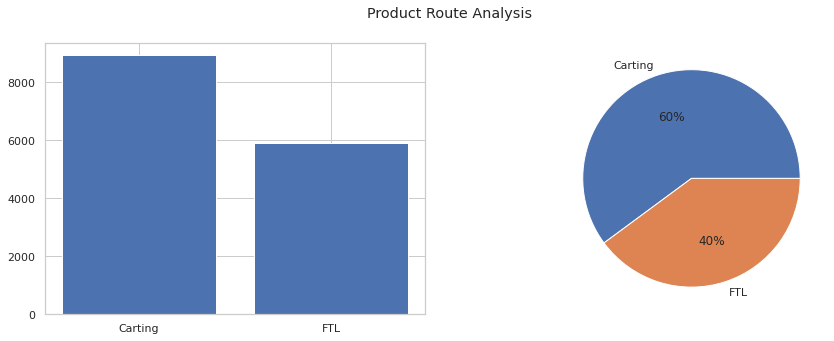

In [171]:
s_vc = df_trip['route_type'].value_counts()
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Product Route Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

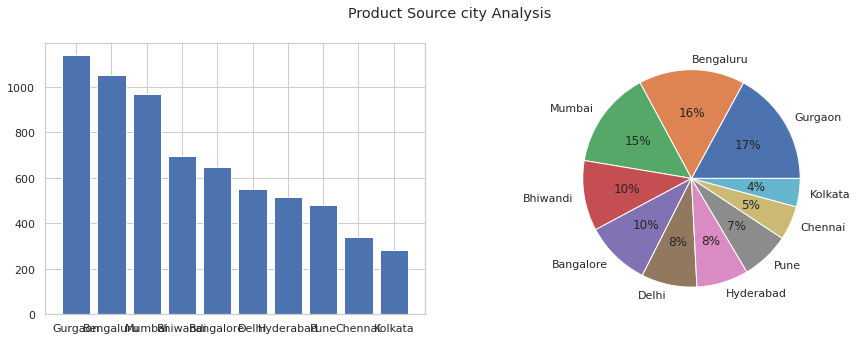

In [172]:
s_vc = df_trip['source_city'].value_counts()[:10]
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Product Source city Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

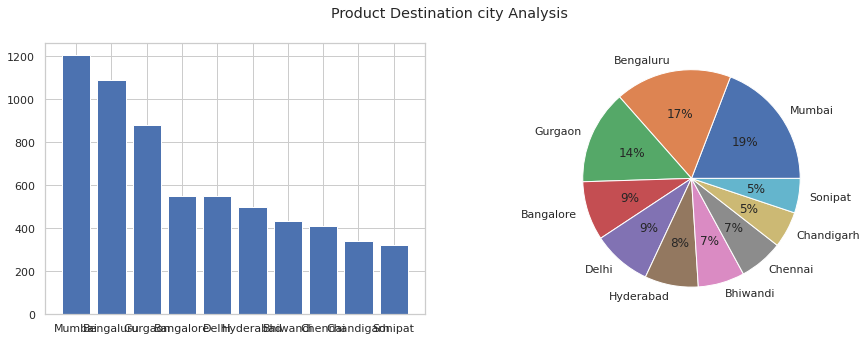

In [173]:
s_vc = df_trip['destination_city'].value_counts()[:10]
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Product Destination city Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

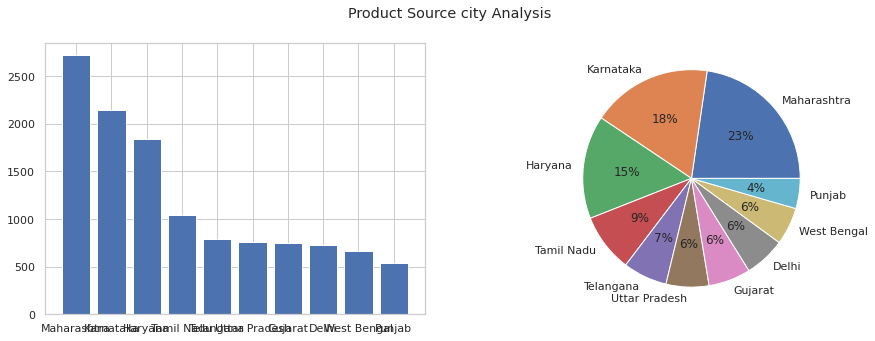

In [174]:
s_vc = df_trip['source_state'].value_counts()[:10]
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Product Source city Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

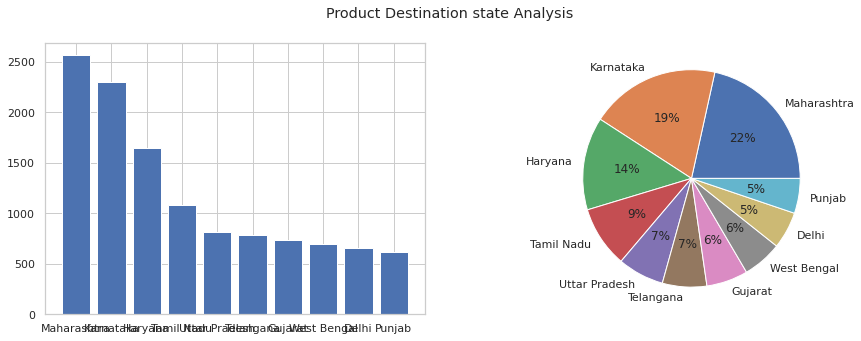

In [175]:
s_vc = df_trip['destination_state'].value_counts()[:10]
fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
fig.suptitle('Product Destination state Analysis')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

In [177]:
df_trip.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,trip_creation_hour,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,0,Kanpur,Central,H 6,Uttar Pradesh,Kanpur,Central,H 6,Uttar Pradesh
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,0,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,0,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB,Haryana
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,0,Mumbai,Hub,,Maharashtra,Mumbai,MiraRd,IP,Maharashtra
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,0,Bellary,Dc,,Karnataka,Sandur,WrdN1DPP,D,Karnataka


In [203]:
df_trip.columns

Index(['trip_uuid', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan', 'od_time_diff',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_distance',
       'segment_osrm_time', 'trip_creation_hour', 'source_city',
       'source_place', 'source_code', 'source_state', 'destination_city',
       'destination_place', 'destination_code', 'destination_state'],
      dtype='object')

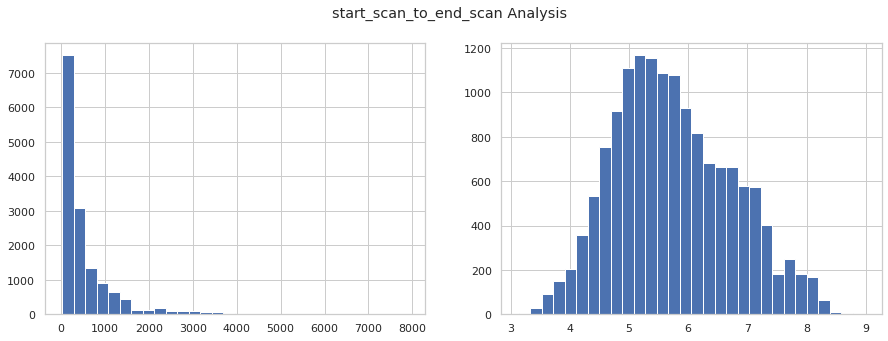

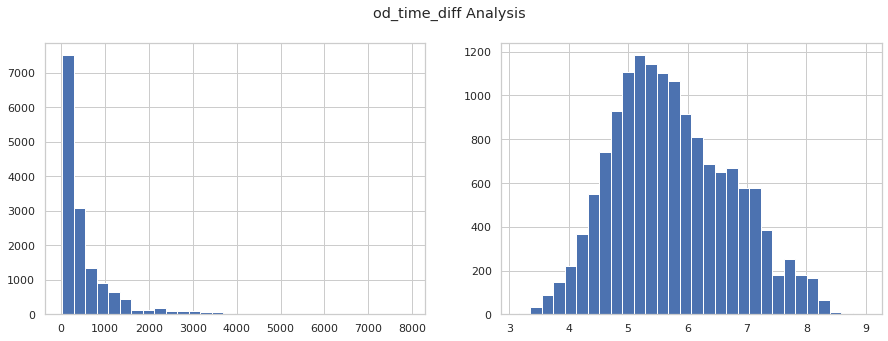

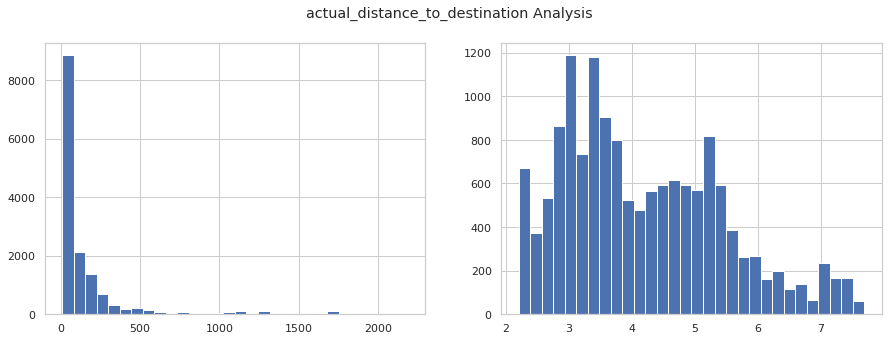

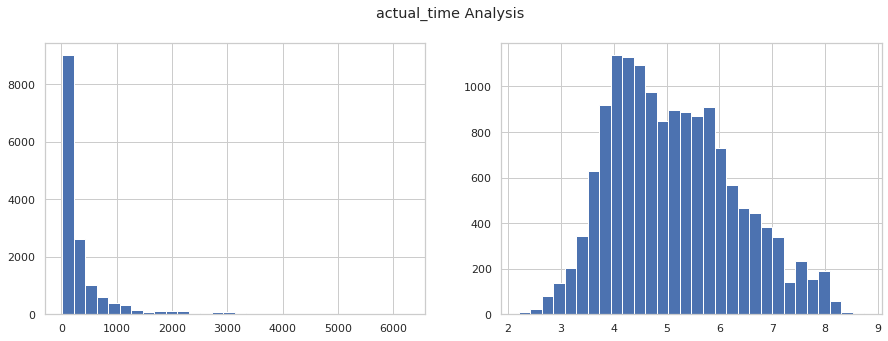

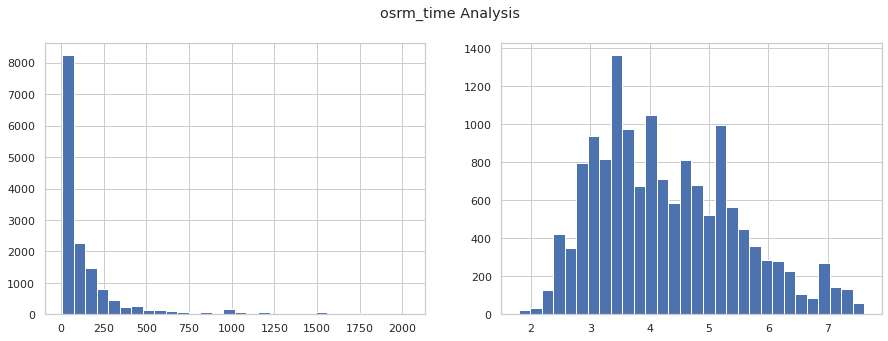

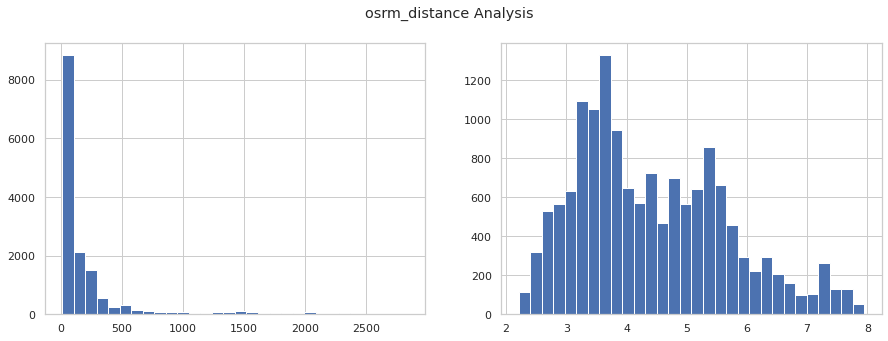

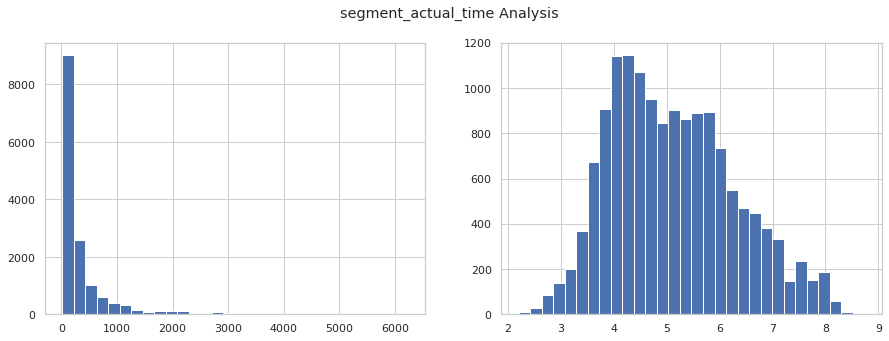

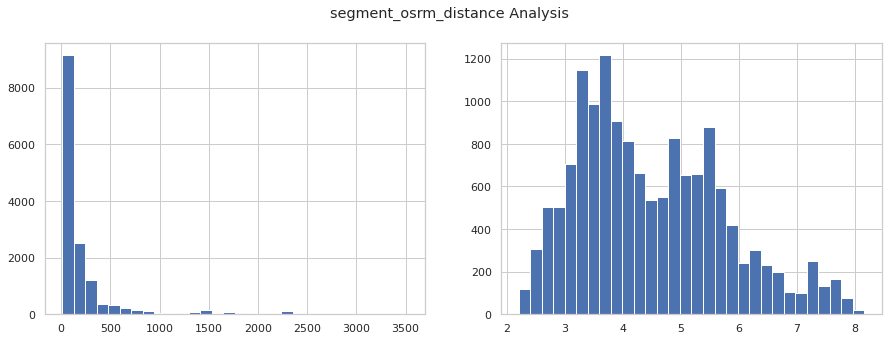

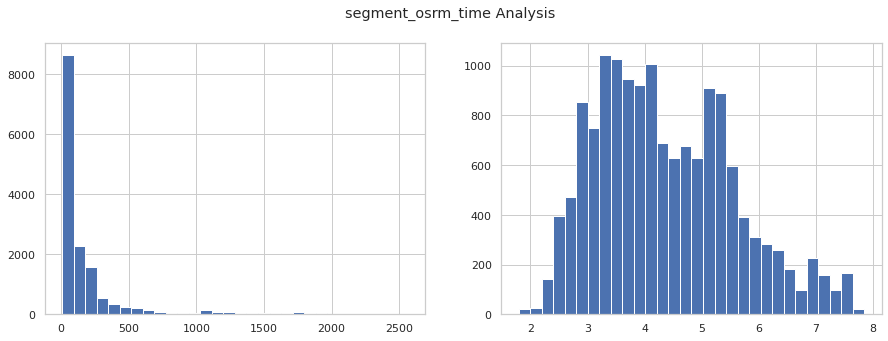

In [207]:
for key in time_distance:
    fig, axs = plt.subplots(1, 2 , figsize =(15, 5))
    fig.suptitle(key +' Analysis')
    axs[0].hist(df_trip[key],bins=30)
    axs[1].hist(df_trip[key+'_log'],bins=30)
    plt.show()

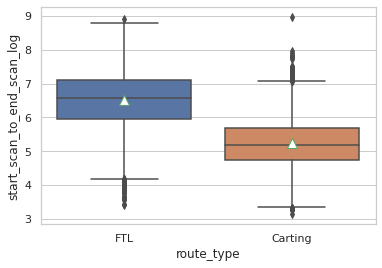

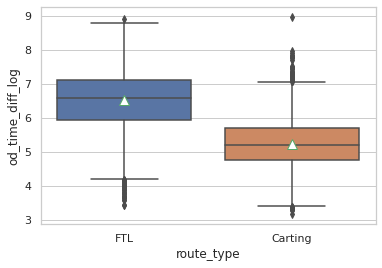

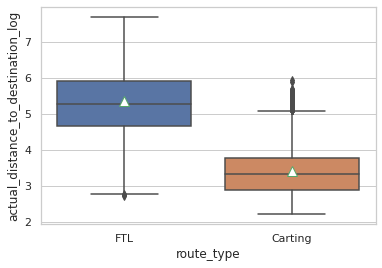

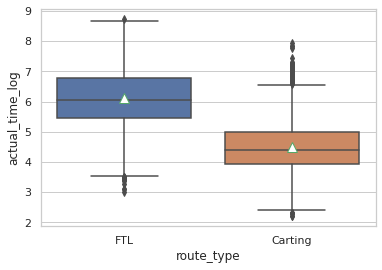

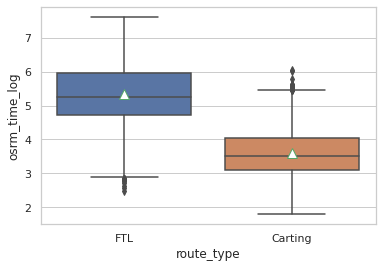

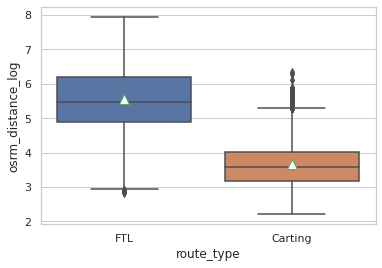

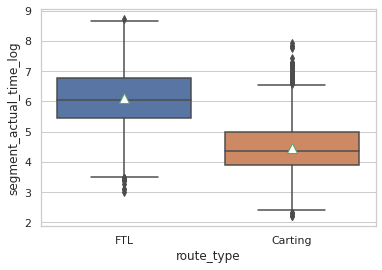

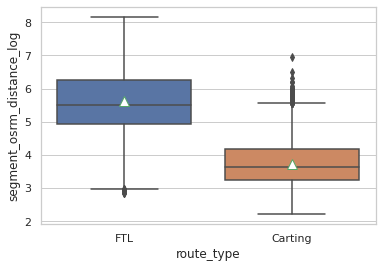

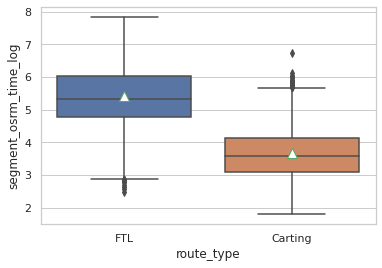

In [214]:
for key in time_distance:
    sns.boxplot(x='route_type',y=key+'_log',data=df_trip,showmeans=True,meanprops={"markerfacecolor":"white","markersize":"10"})
    plt.show()

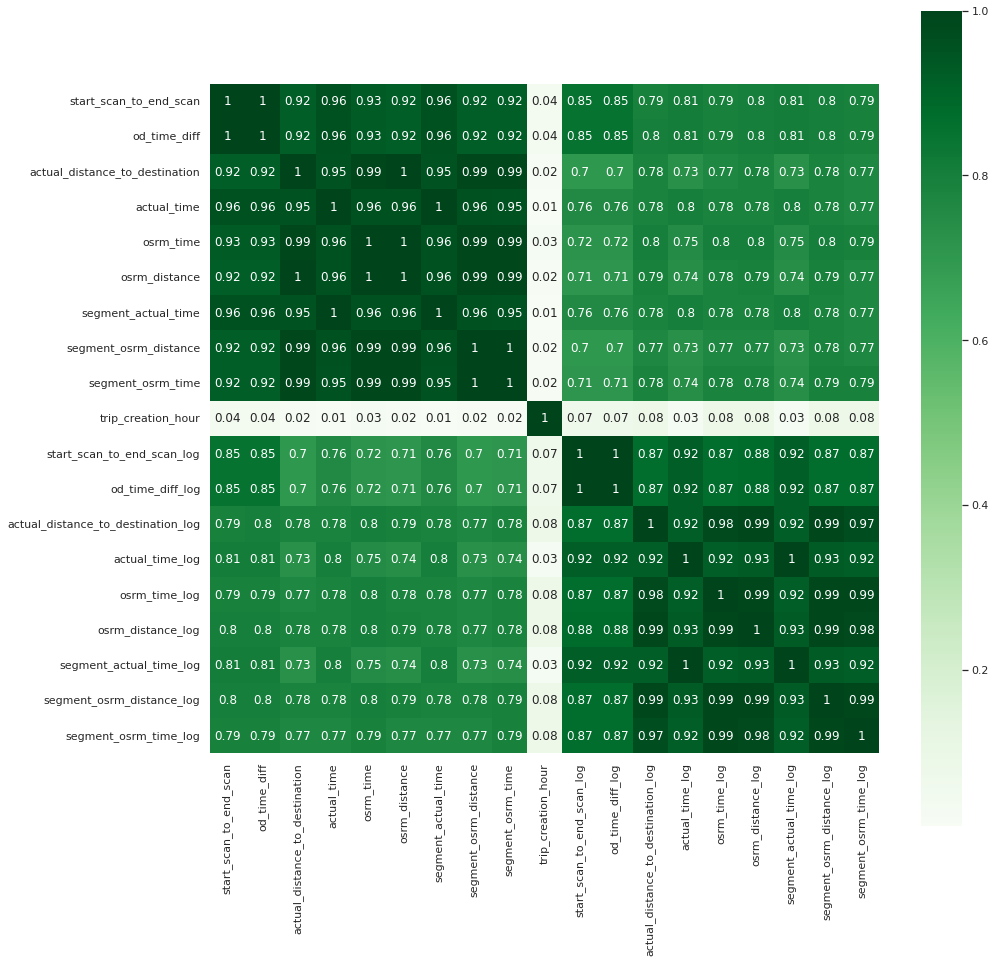

In [218]:
plt.figure(figsize = (15, 15))
ax = sns.heatmap(df_trip.corr().round(2),
            annot=True,cmap='Greens',square=True)

### 2. Feature Creation (10 Points)

In [84]:
df_trip.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


In [255]:
df_trip['trip_creation_hour'] = df_trip['trip_creation_time'].dt.hour

In [256]:
def split_name(name):
    if not pd.isna(name):
        city = name.split(" (",1)
        state = city[1].strip()[:-1]
        cit = city[0].strip().replace("_"," ")
        city_list = cit.split(" ",2)
        if len(city_list)==2:
            city_list.append('')
        elif len(city_list)==1:
            city_list.extend(['',''])
        city_list.append(state)
        return city_list
    else:
        return [None,None,None,None]

In [257]:
split_name('Kanpur_Central_H_6 (Uttar Pradesh)')

['Kanpur', 'Central', 'H 6', 'Uttar Pradesh']

In [258]:
[(i,l) for i,l in zip(df_trip['destination_name'],df_trip['destination_name'].apply(split_name)) if len(l)!=4]

[]

In [259]:
l_l = list(df_trip['source_name'].apply(split_name))

In [260]:
df_trip['source_city'] = [l[0] for l in l_l]
df_trip['source_place'] = [l[1] for l in l_l]
df_trip['source_code'] = [l[2] for l in l_l]
df_trip['source_state'] = [l[3] for l in l_l]

In [261]:
l_l = list(df_trip['destination_name'].apply(split_name))

In [262]:
df_trip['destination_city'] = [l[0] for l in l_l]
df_trip['destination_place'] = [l[1] for l in l_l]
df_trip['destination_code'] = [l[2] for l in l_l]
df_trip['destination_state'] = [l[3] for l in l_l]

In [263]:
df_trip.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,trip_creation_hour,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,start_scan_to_end_scan_log,od_time_diff_log,actual_distance_to_destination_log,actual_time_log,osrm_time_log,osrm_distance_log,segment_actual_time_log,segment_osrm_distance_log,segment_osrm_time_log
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,0,Kanpur,Central,H 6,Uttar Pradesh,Kanpur,Central,H 6,Uttar Pradesh,7.722678,7.723169,6.715060,7.353722,6.575076,6.899070,7.344719,7.185746,6.915723
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,0,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,5.192957,5.201872,4.293017,4.962845,4.219508,4.443956,4.948760,4.433069,4.174387
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,0,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB,Haryana,8.277158,8.277504,7.563929,8.115820,7.461640,7.763900,8.104099,7.841991,7.570959
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,0,Mumbai,Hub,,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,4.605170,4.610107,2.843471,4.077537,2.708050,2.979603,4.077537,2.989543,2.772589
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,0,Bellary,Dc,,Karnataka,Sandur,WrdN1DPP,D,Karnataka,6.575076,6.576956,4.847712,5.831882,4.762174,4.989015,5.828946,4.989016,4.744932


### 4. Comparison & Visualization of time and distance fields (10 Points)

In [219]:
df_trip.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,trip_creation_hour,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,start_scan_to_end_scan_log,od_time_diff_log,actual_distance_to_destination_log,actual_time_log,osrm_time_log,osrm_distance_log,segment_actual_time_log,segment_osrm_distance_log,segment_osrm_time_log
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,0,Kanpur,Central,H 6,Uttar Pradesh,Kanpur,Central,H 6,Uttar Pradesh,7.722678,7.723169,6.715060,7.353722,6.575076,6.899070,7.344719,7.185746,6.915723
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,0,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,5.192957,5.201872,4.293017,4.962845,4.219508,4.443956,4.948760,4.433069,4.174387
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,0,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB,Haryana,8.277158,8.277504,7.563929,8.115820,7.461640,7.763900,8.104099,7.841991,7.570959
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,0,Mumbai,Hub,,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,4.605170,4.610107,2.843471,4.077537,2.708050,2.979603,4.077537,2.989543,2.772589
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,0,Bellary,Dc,,Karnataka,Sandur,WrdN1DPP,D,Karnataka,6.575076,6.576956,4.847712,5.831882,4.762174,4.989015,5.828946,4.989016,4.744932


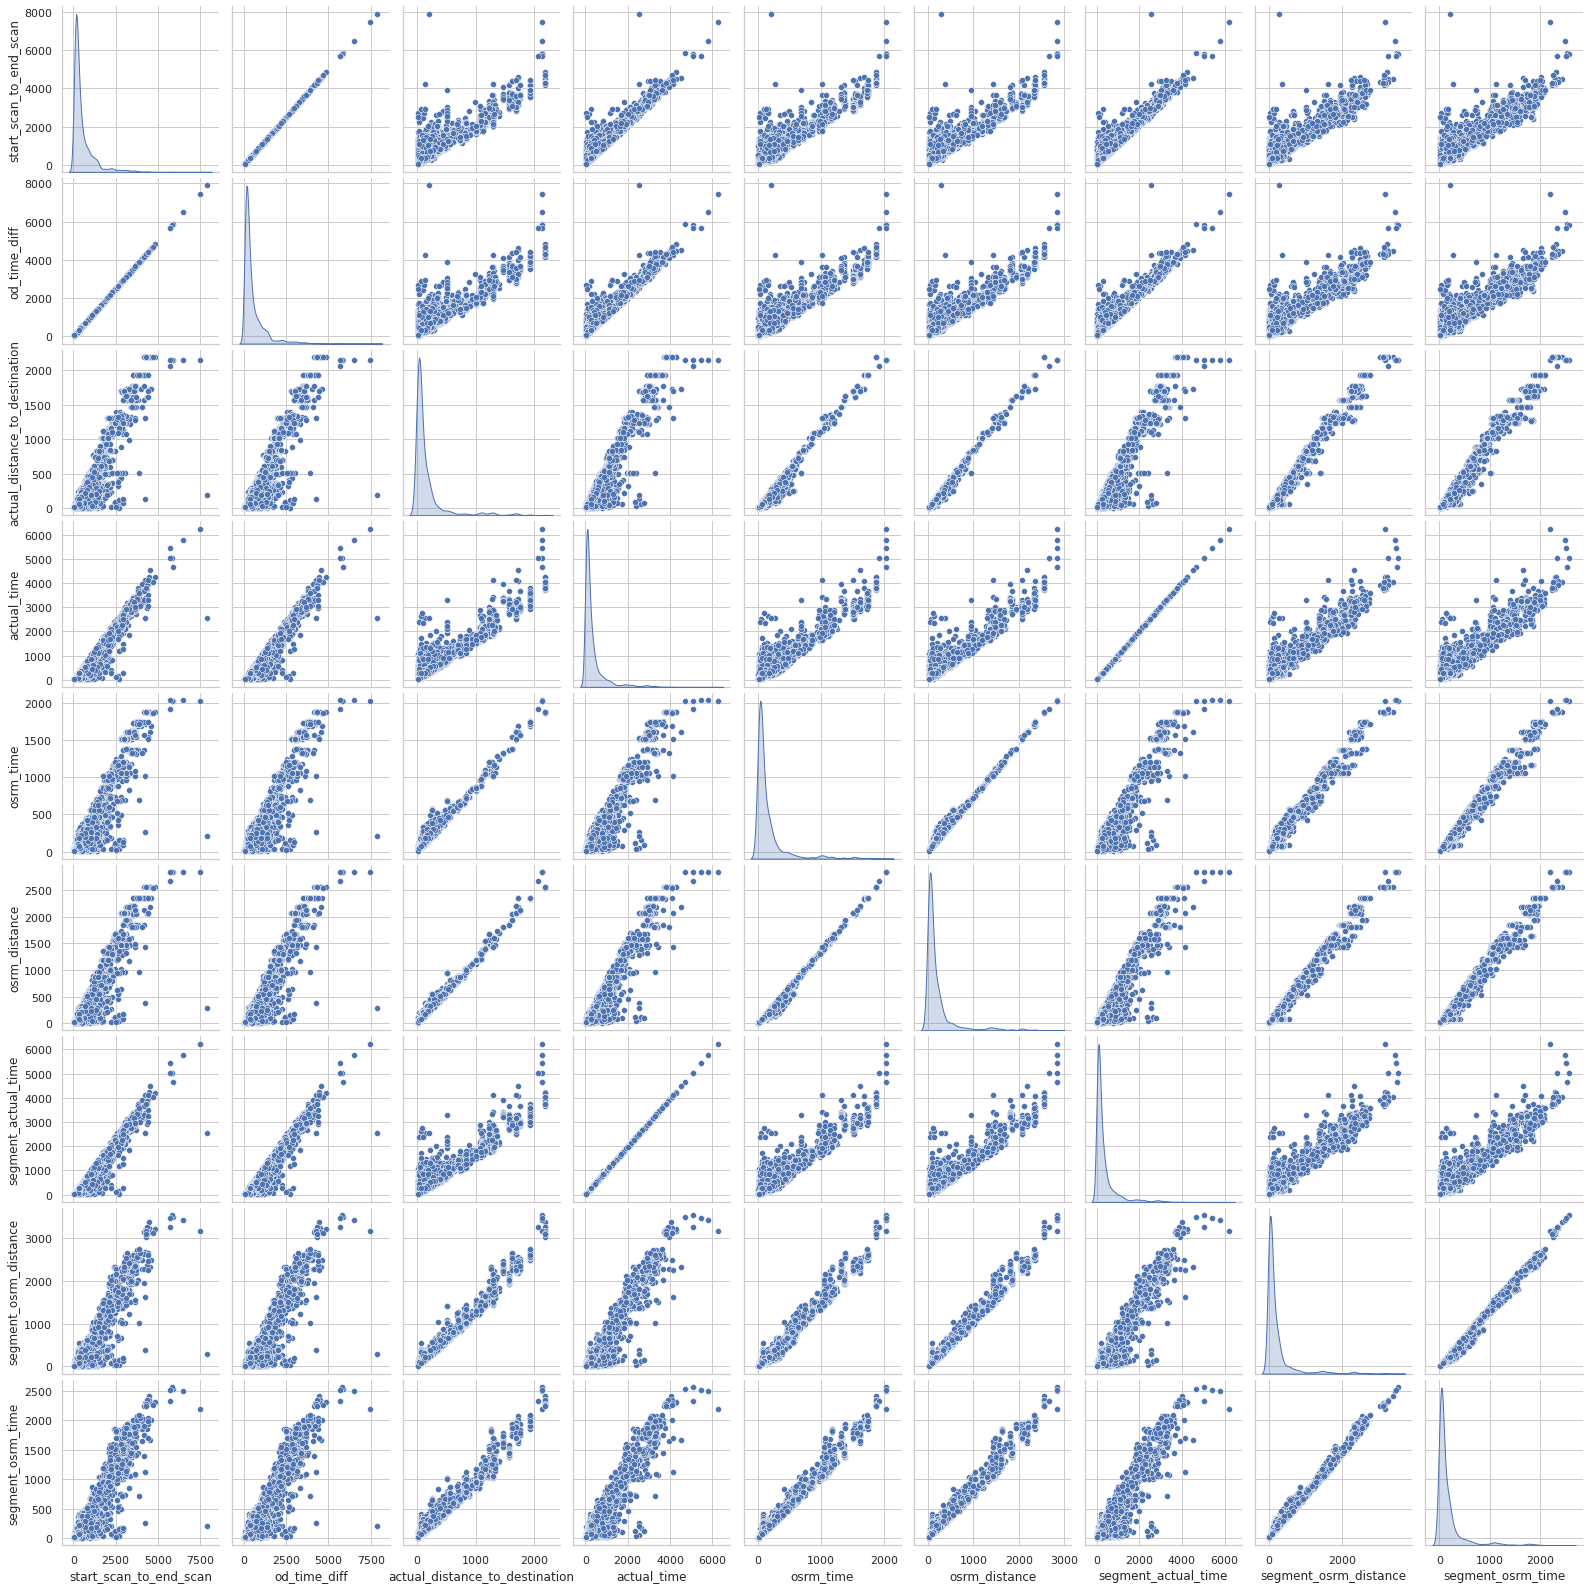

In [229]:
sns.pairplot(data=df_trip[time_distance],diag_kind='kde')

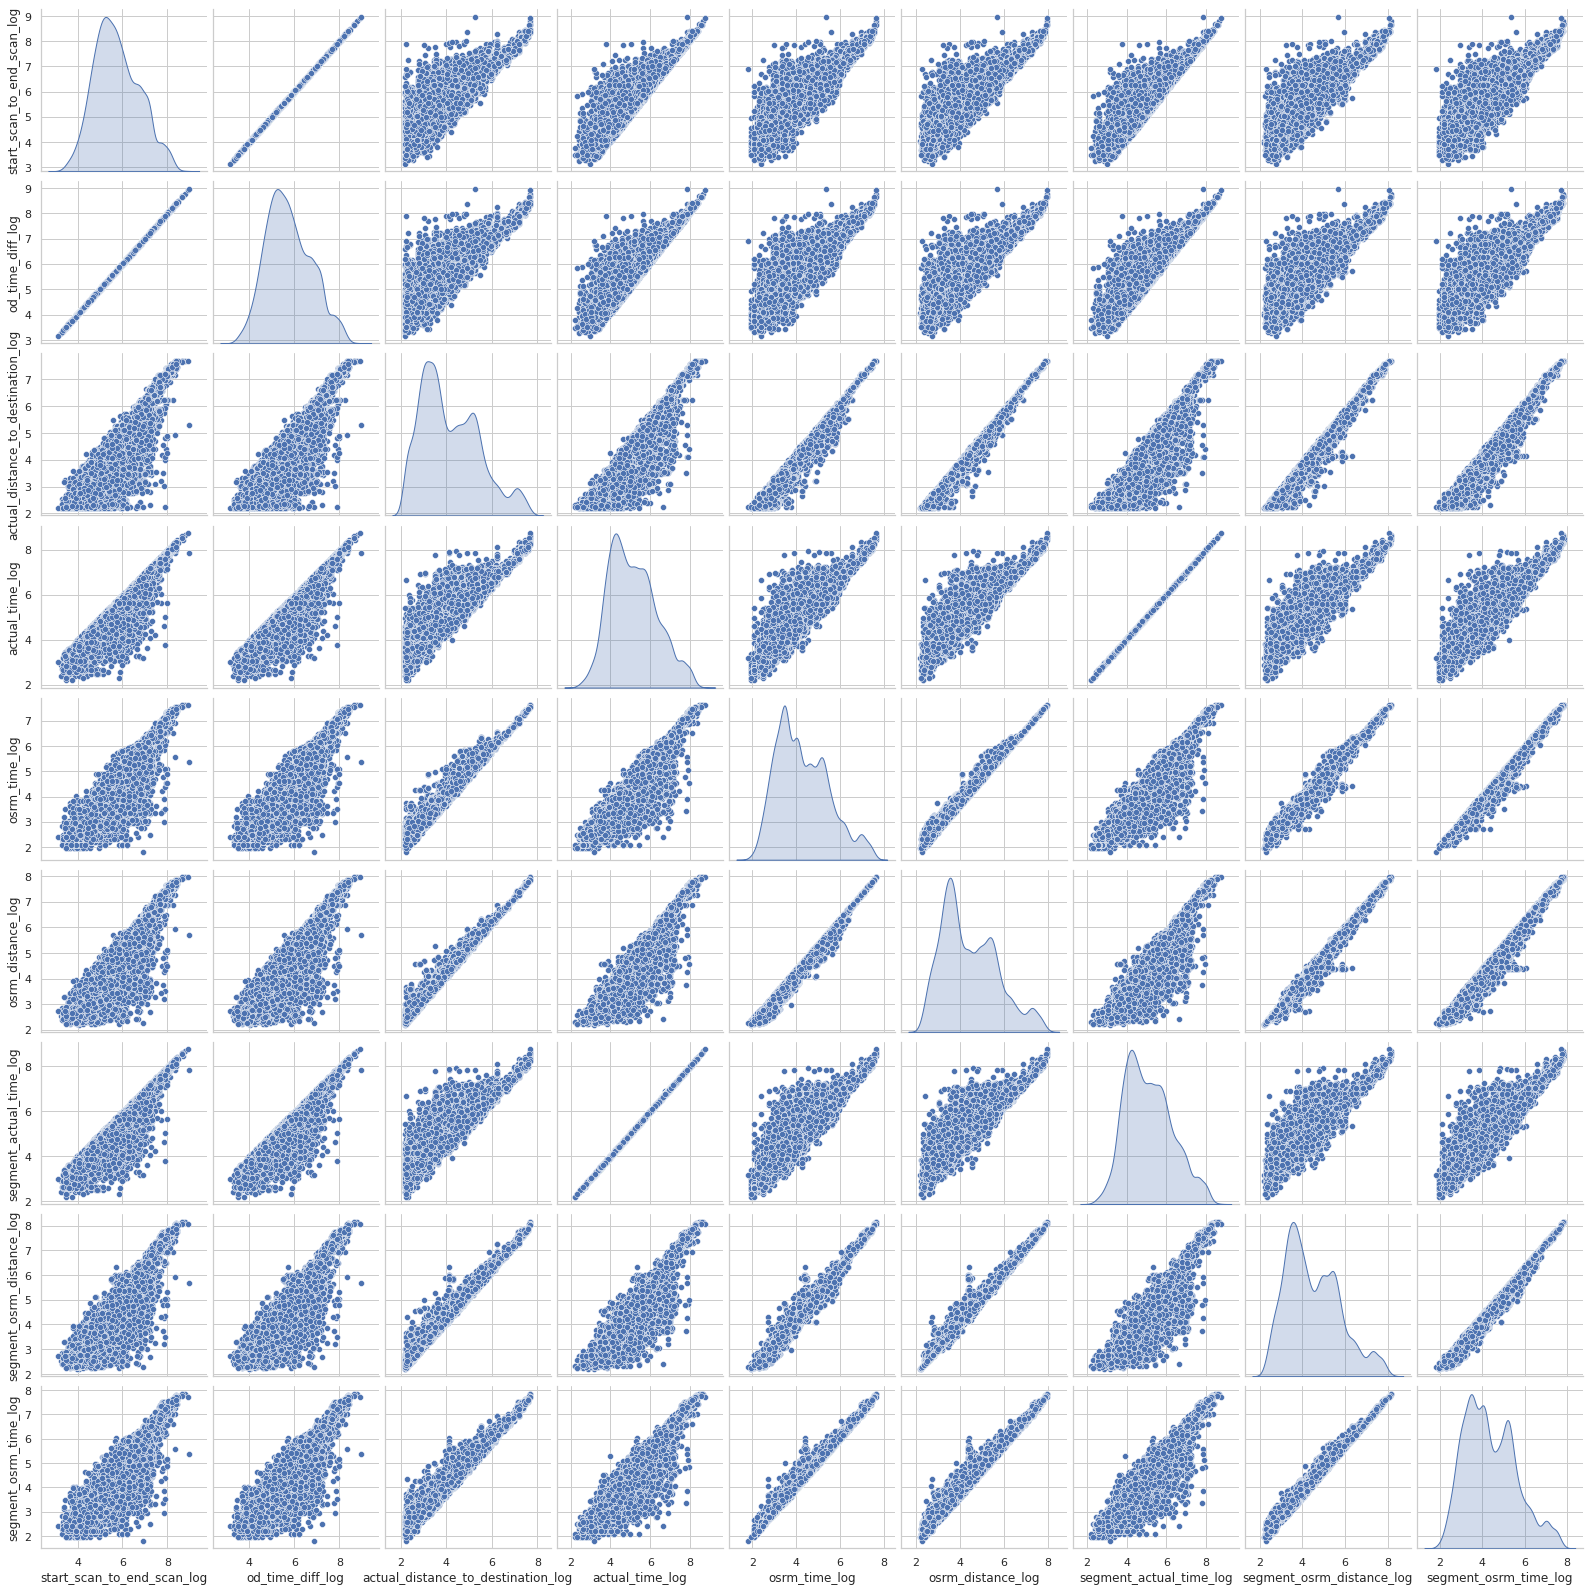

In [230]:
sns.pairplot(data=df_trip[[t+'_log' for t in time_distance]],diag_kind='kde')

### 6. Checking relationship between aggregated fields (10 Points)

H0: Data is Gaussian \
Ha: Data is not Gaussian

test : kstest

p-value : 0.05

In [280]:
for key in time_distance:
    kstest_test(df_trip[key+'_log'].sample(300))
    print()

Mean :  5.84 , Standard deviation :  1.08
p-value :  0.11935827634770035
Fail to reject H0
Data is Gaussian

Mean :  5.8 , Standard deviation :  0.94
p-value :  0.013845439361702338
Reject H0
Data is not Gaussian

Mean :  4.22 , Standard deviation :  1.31
p-value :  0.00013038627020496425
Reject H0
Data is not Gaussian

Mean :  5.13 , Standard deviation :  1.18
p-value :  0.04933229086420676
Reject H0
Data is not Gaussian

Mean :  4.21 , Standard deviation :  1.11
p-value :  0.010791600145108604
Reject H0
Data is not Gaussian

Mean :  4.58 , Standard deviation :  1.3
p-value :  0.0022994138636897553
Reject H0
Data is not Gaussian

Mean :  5.11 , Standard deviation :  1.24
p-value :  0.0035612912421839143
Reject H0
Data is not Gaussian

Mean :  4.52 , Standard deviation :  1.31
p-value :  0.002768596797753748
Reject H0
Data is not Gaussian

Mean :  4.29 , Standard deviation :  1.19
p-value :  0.016710108619584798
Reject H0
Data is not Gaussian



In [281]:
time_distance

['start_scan_to_end_scan',
 'od_time_diff',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_distance',
 'segment_osrm_time']

H0: mean actual time taken to deliver is equal to mean osrm time taken \
Ha: mean actual time taken to deliver is not-equal to mean osrm time taken

hypothesis test : T-test for independent samples \
p-value : 0.05 (two-tailed)

In [377]:
smp1 = df_trip['actual_time_log'].sample(3000)
smp2 = df_trip['osrm_time_log'].sample(3000)
smp1.mean(),smp2.mean()

(5.113023069166416, 4.318621085245073)

In [378]:
ttest_ind_test(smp1,smp2 ,alternative='less')

Series1 metrics : 
Mean :  5.11 , Standard deviation :  1.18
Series2 metrics : 
Mean :  4.32 , Standard deviation :  1.19
p-value :  1.0
Fail to reject H0


H0: mean actual time taken to deliver is equal to mean segment actual time taken \
Ha: mean actual time taken to deliver is not-equal to mean segment actual time taken

hypothesis test : T-test for independent samples \
p-value : 0.05 (two-tailed)

In [430]:
smp1 = df_trip['actual_time_log'].sample(3000)
smp2 = df_trip['segment_actual_time_log'].sample(3000)
smp1.mean(),smp2.mean()

(5.149034402451168, 5.108592426731569)

In [431]:
ttest_ind_test(smp1,smp2 ,alternative='greater')

Series1 metrics : 
Mean :  5.15 , Standard deviation :  1.16
Series2 metrics : 
Mean :  5.11 , Standard deviation :  1.17
p-value :  0.08964437416840079
Reject H0


H0: mean actual time taken to deliver is equal to mean osrm time taken \
Ha: mean actual time taken to deliver is not-equal to mean osrm time taken

hypothesis test : T-test for independent samples \
p-value : 0.05 (two-tailed)

In [435]:
smp1 = df_trip['actual_time_log'].sample(2000)
smp2 = df_trip['osrm_time_log'].sample(2000)
smp1.mean(),smp2.mean()

(5.093486622670581, 4.287385001601136)

In [436]:
ttest_ind_test(smp1,smp2 ,alternative='less')

Series1 metrics : 
Mean :  5.09 , Standard deviation :  1.18
Series2 metrics : 
Mean :  4.29 , Standard deviation :  1.2
p-value :  1.0
Fail to reject H0


H0: mean segment osrm distance taken to deliver is equal to mean osrm distance taken \
Ha: mean segment osrm distance taken to deliver is not-equal to mean osrm distance taken

hypothesis test : T-test for independent samples \
p-value : 0.05 (two-tailed)

In [455]:
smp1 = df_trip['segment_osrm_distance_log'].sample(3000)
smp2 = df_trip['osrm_distance_log'].sample(3000)
smp1.mean(),smp2.mean()

(4.428466685593908, 4.4108154524547665)

In [456]:
ttest_ind_test(smp1,smp2 ,alternative='less')

Series1 metrics : 
Mean :  4.43 , Standard deviation :  1.27
Series2 metrics : 
Mean :  4.41 , Standard deviation :  1.25
p-value :  0.7063181754113308
Fail to reject H0


H0: mean actual distance taken to deliver is equal to mean osrm distance taken \
Ha: mean actual distance taken to deliver is not-equal to mean osrm distance taken

hypothesis test : T-test for independent samples \
p-value : 0.05 (two-tailed)

In [328]:
smp1 = df_trip['actual_distance_to_destination_log'].sample(1000)
smp2 = df_trip['osrm_distance_log'].sample(1000)
smp1.mean(),smp2.mean()

(4.131260892892641, 4.438064129071632)

In [329]:
ttest_ind_test(smp1,smp2 ,alternative='greater')

Series1 metrics : 
Mean :  4.13 , Standard deviation :  1.27
Series2 metrics : 
Mean :  4.44 , Standard deviation :  1.24
p-value :  0.9999999750000707
Fail to reject H0


### 7. Handling categorical values (10 Points)

In [468]:
df_trips = pd.get_dummies(df_trip, columns = ['route_type','source_state','source_city','destination_state','destination_city'])

In [465]:
df_trip['source_state'].value_counts()[:20].index

Index(['Maharashtra', 'Karnataka', 'Haryana', 'Tamil Nadu', 'Telangana',
       'Uttar Pradesh', 'Gujarat', 'Delhi', 'West Bengal', 'Punjab',
       'Rajasthan', 'Andhra Pradesh', 'Bihar', 'Madhya Pradesh', 'Kerala',
       'Assam', 'Jharkhand', 'Uttarakhand', 'Orissa', 'Chandigarh'],
      dtype='object')

In [466]:
df_trip['destination_state'].value_counts()[:20].index

Index(['Maharashtra', 'Karnataka', 'Haryana', 'Tamil Nadu', 'Uttar Pradesh',
       'Telangana', 'Gujarat', 'West Bengal', 'Delhi', 'Punjab', 'Rajasthan',
       'Andhra Pradesh', 'Bihar', 'Madhya Pradesh', 'Kerala', 'Assam',
       'Jharkhand', 'Uttarakhand', 'Orissa', 'Chandigarh'],
      dtype='object')

### 8. Column Normalization /Column Standardization (10 Points)

In [470]:
scaler = MinMaxScaler()
scaler.fit(df_trip[time_distance + time_distance_log])

MinMaxScaler()

In [472]:
mx_data = scaler.transform(df_trip[time_distance + time_distance_log])

In [474]:
mx_df = pd.DataFrame(data=mx_data,columns=time_distance + time_distance_log)

In [480]:
mx_df.columns = [col+'_mx' for col in mx_df.columns]

In [482]:
scaler = StandardScaler()
scaler.fit(df_trip[time_distance + time_distance_log])

StandardScaler()

In [483]:
ss_data = scaler.transform(df_trip[time_distance + time_distance_log])

In [484]:
ss_df = pd.DataFrame(data=ss_data,columns=time_distance + time_distance_log)

In [485]:
ss_df.columns = [col+'_ss' for col in ss_df.columns]

In [489]:
df_trips.reset_index(drop=True,inplace=True)

In [492]:
df_ = pd.concat([df_trips,mx_df,ss_df],axis=1)

In [493]:
df_.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,trip_creation_hour,source_place,source_code,destination_place,destination_code,start_scan_to_end_scan_log,od_time_diff_log,actual_distance_to_destination_log,actual_time_log,osrm_time_log,osrm_distance_log,segment_actual_time_log,segment_osrm_distance_log,segment_osrm_time_log,route_type_Carting,route_type_FTL,source_state_Andhra Pradesh,source_state_Arunachal Pradesh,source_state_Assam,source_state_Bihar,source_state_Chandigarh,source_state_Chhattisgarh,source_state_Dadra and Nagar Haveli,source_state_Delhi,source_state_Goa,source_state_Gujarat,source_state_Haryana,source_state_Himachal Pradesh,source_state_Jammu & Kashmir,source_state_Jharkhand,source_state_Karnataka,source_state_Kerala,source_state_Madhya Pradesh,source_state_Maharashtra,source_state_Mizoram,source_state_Nagaland,source_state_Orissa,source_state_Pondicherry,source_state_Punjab,source_state_Rajasthan,source_state_Tamil Nadu,source_state_Telangana,source_state_Uttar Pradesh,source_state_Uttarakhand,source_state_West Bengal,source_city_AMD,source_city_Achrol,source_city_Agra,source_city_Ahmedabad,source_city_Airport,source_city_Aizawl,source_city_Ajmer,source_city_Akbarpur,source_city_Akhnoor,source_city_Akola,source_city_Aland,source_city_Alappuzha,source_city_Aliganj,source_city_Aligarh,source_city_Allahabad,source_city_Almora,source_city_Aluva,source_city_Alwar,source_city_Amalapuram,source_city_Ambah,source_city_Ambala,source_city_Ambasamdrm,source_city_Ambegaon,source_city_Amd,source_city_Amravati,source_city_Amreli,source_city_Anand,source_city_AnandprShb,source_city_Anantapur,source_city_Angamaly,source_city_Angul,source_city_Anjar,source_city_Ankola,source_city_Anthiyour,source_city_Aonla,source_city_Arakkonam,source_city_Arambag,source_city_Araria,source_city_Arrah,source_city_Arsikere,source_city_Asangaon,source_city_Asansol,source_city_Ashokngr,source_city_Ashta,source_city_Asifabad,source_city_Athani,source_city_Atmakur,source_city_Auraiya,source_city_Aurangabad,source_city_AurngbadBR,source_city_BLR,source_city_BOM,source_city_Baddi,source_city_Bagepalli,source_city_Bagnan,source_city_Bahadurgarh,source_city_Baharampur,source_city_Baheri,source_city_Bailhongal,source_city_Balangir,source_city_Balasore,source_city_Balrampur,source_city_Balurghat,source_city_Bamangola,source_city_Bangalore,source_city_Bangana,source_city_Bangarapet,source_city_Banka,source_city_Bankura,source_city_Bantwal,source_city_Barasat,source_city_Baraut,source_city_Bareilly,source_city_Bareli,source_city_Barh,source_city_Barhi,source_city_BariSadri,source_city_Baripada,source_city_Barmer,source_city_Barnala,source_city_Bassi,source_city_Basti,source_city_Beed,source_city_Bellary,source_city_Bellmpalli,source_city_Bengaluru,source_city_Berhampore,source_city_Bethamangala,source_city_Bettiah,source_city_Betul,source_city_Bewar,source_city_Bhabhar,source_city_Bhadohi,source_city_Bhadrachalam,source_city_Bhadrak,source_city_Bhagalpur,source_city_Bhandara,source_city_Bhanvad,source_city_Bharatpur,source_city_Bhatinda,source_city_Bhatiya,source_city_Bhatpara,source_city_Bhavnagar,source_city_Bheemunipatnam,source_city_Bhilad,source_city_Bhilwara,source_city_Bhiwandi,source_city_Bhiwani,source_city_Bhopal,source_city_Bhubaneshwar,source_city_Bhubaneswar,source_city_Bhuj,source_city_Bhusawal,source_city_Bhuvanagiri,source_city_BiharSarif,source_city_Bihta,source_city_Bijapur,source_city_Bikaner,source_city_Bikramgang,source_city_Bilaspur,source_city_BilaspurHP,source_city_Bilimora,source_city_Bina,source_city_Bishnupur,source_city_Bishwanath,source_city_Blr,source_city_Boisar,source_city_Bokaro,source_city_Bongaigaon,source_city_Bongaon,source_city_Brahmapuri,source_city_Brajrajnagar,source_city_Buldhana,sour

### 9. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it.

60% of deliveries are through carting and  40% of deliveries FTL \
Bangalore , gurgram,  mumbai cities contribute to nearly 40 % of the deliveries \
Karnataka, Maharastra, Haryana states contribute to nearly 40% of the deliveries \
FTL deliveries takes more time than carting deliveries

### 10. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

We need to focus on increasing carting deliveries because the deliver faster and less distance, so we need more hubs \
we need to divercify across the cities and states, because most of our deliveries come from only 3-4 states \
actual and osrm time is significant, so we need to optimize the performance of the engine.